In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

In [1]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.9.0              |           py36_0         379 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    certifi-2019.6.16          |           py36_1         156 KB  anaconda
    ca-certificates-2019.5.15  |                1         134 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-1       --> 2019.5.15-1      anaconda
    certifi:         2019.6.16-py36_1  --> 2019.6.16-py36_1 anaconda
    openssl:         1.1.1c-h7b6447c_1 --> 1.1.1-h7b6447c_0 anaconda
    seaborn:         0.9.0-py36_0     

In [62]:
!conda install -c anaconda pydotplus -y

Solving environment: done

# All requested packages already installed.



In [3]:
#Loading the dataset
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-09-20 08:41:44--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2019-09-20 08:41:45 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



<h2>Reading the loan_train.csv file into dataframe</h2>

In [63]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [64]:
df.shape

(346, 10)

<h2>Changing the due_date and effective_date to object</h2>

In [65]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


<h2>Visualization and preprocessing</h2>

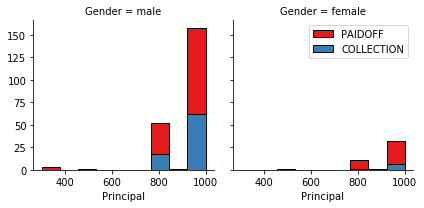

In [66]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

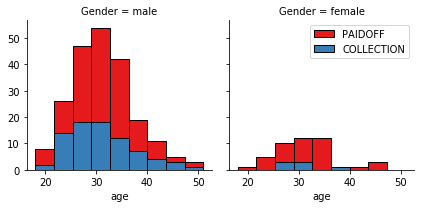

In [67]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<h2>Converting Data to numerical values</h2>

In [68]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


In [69]:
df['education'].replace(to_replace=['High School or Below', 'Bechalor', 'college', 'Master or Above'], value=[0,1,2,3], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,2,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,2,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,2,0


<h2>Feature selection</h2>

In [70]:
X = df[['Principal','terms','age','Gender','education']]
X.head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,0
1,1000,30,33,1,1
2,1000,15,27,0,2
3,1000,30,28,1,2
4,1000,30,29,0,2


In [71]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

<h2>Normalize data</h2>

In [72]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.06604119],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -0.00612667],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004,  1.05378785],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  1.05378785],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  1.05378785]])

<h1>Classification</h1>

<h2>K-Nearest Neighbour(KNN)</h2>

In [73]:
#train-test split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.2, random_state=4)

In [74]:
k=10
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))

for n in range(1,k):
    
    #training the model
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_trainset,y_trainset)
    yhat = neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)
    
    std_acc[n-1] = np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])
    
print(mean_acc)
knn_best = mean_acc.argmax()+1
print("Best accuracy is with neighbours ",knn_best)
print("Best accuracy is ",mean_acc[knn_best-1])

[0.65714286 0.54285714 0.68571429 0.64285714 0.77142857 0.74285714
 0.74285714 0.7        0.74285714]
Best accuracy is with neighbours  5
Best accuracy is  0.7714285714285715


In [138]:
#F1 score and Jaccard score for KNN with 7 neighbours
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

neigh = KNeighborsClassifier(n_neighbors=7).fit(X_trainset,y_trainset)
knn_pred = neigh.predict(X_testset)
f1_score_knn = f1_score(y_testset, knn_pred, average='weighted')
jac_score_knn = jaccard_similarity_score(y_testset,knn_pred)
print("F1 score : ",f1_score_knn)
print("Jaccard Similarity index : ",jac_score_knn)

F1 score :  0.6892857142857144
Jaccard Similarity index :  0.7428571428571429


<h2>Decision Tree</h2>

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth=6)
loan_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
#training the model on the test set
loan_tree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
#prediction
pred_tree = loan_tree.predict(X_testset)

In [80]:
#To compare the predictions
print("Predicted values : ",pred_tree[0:10])
print("Actual values : ",y_testset[0:10])

Predicted values :  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF']
Actual values :  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


<b>Accuracy</b>

In [81]:
#Decision tree's accuracy
print("Decision tree's accuracy : ", metrics.accuracy_score(y_testset, pred_tree))

Decision tree's accuracy :  0.7285714285714285


<b>Jaccard Score</b>

In [145]:
jac_score_dectree = jaccard_similarity_score(y_testset, pred_tree)
print("The Jaccard score for the tree is : ", jac_score_dectree)

The Jaccard score for the tree is :  0.7285714285714285


<b>F1 Score<b>

In [146]:
f1_score_dectree = f1_score(y_testset, pred_tree, average='weighted')
print("The F1 score for the tree is : ", f1_score_dectree)

The F1 score for the tree is :  0.6623376623376623


<b>Visulization of the predicted tree</b>

In [84]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

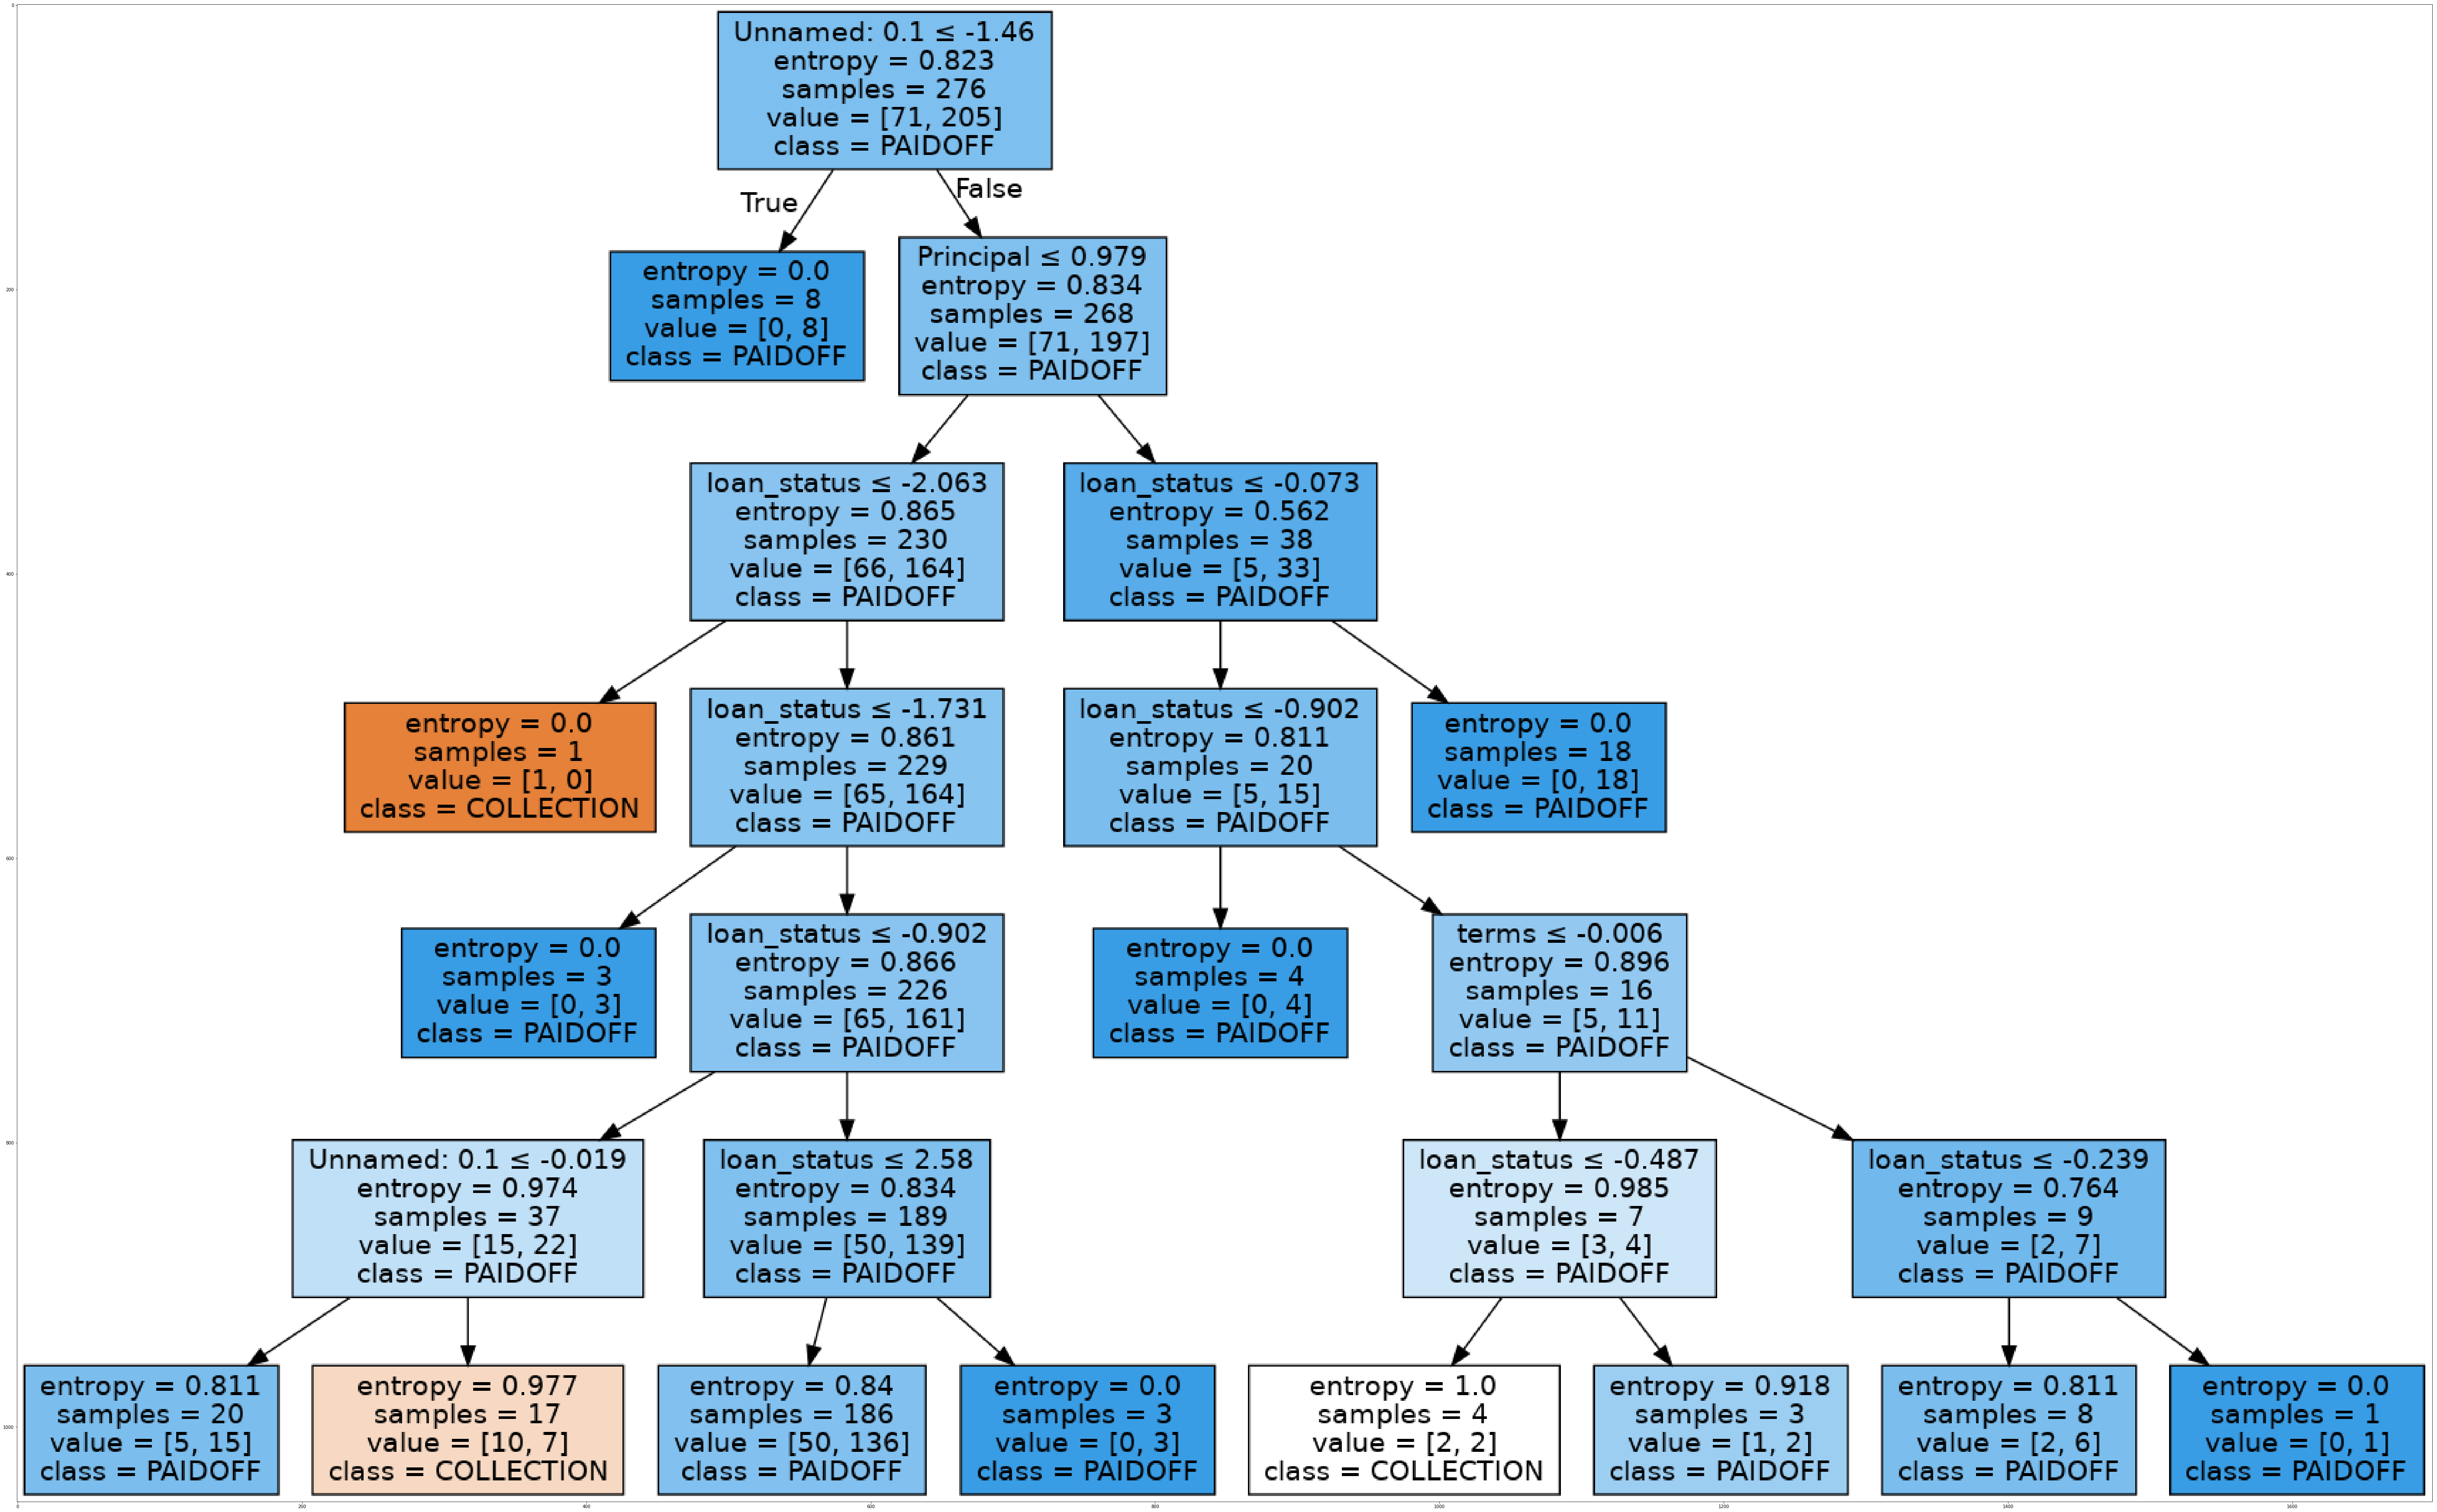

In [85]:
dot_data = StringIO()
filename = "loantree.png"
featureNames = df.columns[0:5]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loan_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<h2>Support Vector Machines</h2>

In [106]:
from sklearn import svm

krnls = ['linear', 'rbf', 'sigmoid']
mean_accuracy = np.zeros((len(krnls)))
i=0
for kernel in krnls:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_trainset, y_trainset)
    svm_pred = clf.predict(X_testset)
    mean_accuracy[krnls.index(kernel)] = metrics.accuracy_score(y_testset, svm_pred)
    
    print("For ", kernel, "model : ")
    print("Mean Accuracy : ", mean_accuracy[i])
    i = i+1
    
print("The best accuracy is :", mean_accuracy.max())

For  linear model : 
Mean Accuracy :  0.7857142857142857
For  rbf model : 
Mean Accuracy :  0.7857142857142857
For  sigmoid model : 
Mean Accuracy :  0.7285714285714285
The best accuracy is : 0.7857142857142857


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<b>Jaccard Score</b>

In [161]:
#For RBF
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset)
svm_pred = clf.predict(X_testset)
jac_score_svm_rbf = jaccard_similarity_score(y_testset, svm_pred)
f1_score_svm_rbf = f1_score(y_testset, svm_pred, average='weighted')
print("Jaccard score : ", jac_score_svm_rbf,"\nF1 Score : ", f1_score_svm_rbf)

Jaccard score :  0.7857142857142857 
F1 Score :  0.6914285714285714


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [162]:
#For Linear
clf = svm.SVC(kernel='linear')
clf.fit(X_trainset, y_trainset)
svm_pred = clf.predict(X_testset)
jac_score_svm_linear = jaccard_similarity_score(y_testset, svm_pred)
f1_score_svm_linear = f1_score(y_testset, svm_pred, average='weighted')
print("Jaccard score : ", jac_score_svm_linear,"\nF1 Score : ", f1_score_svm_linear)

Jaccard score :  0.7857142857142857 
F1 Score :  0.6914285714285714


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [163]:
#For Sigmoid
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_trainset, y_trainset)
svm_pred = clf.predict(X_testset)
jac_score_svm_sigmoid = jaccard_similarity_score(y_testset, svm_pred)
f1_score_svm_sigmoid = f1_score(y_testset, svm_pred, average='weighted')
print("Jaccard score : ", jac_score_svm_sigmoid,"\nF1 Score : ", f1_score_svm_sigmoid)

Jaccard score :  0.7285714285714285 
F1 Score :  0.6806722689075629


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [164]:
jac_score_svm = max(jac_score_svm_rbf, jac_score_svm_linear, jac_score_svm_sigmoid)
f1_score_svm = max(f1_score_svm_rbf, f1_score_svm_linear, f1_score_svm_sigmoid)
print("The best Jaccard score for SVM is : ", jac_score_svm)
print("The best F1 score for SVM is : ", f1_score_svm)

The best Jaccard score for SVM is :  0.7857142857142857
The best F1 score for SVM is :  0.6914285714285714


<h2>Logistic Regression</h2>

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [115]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset, y_trainset)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [155]:
lr_pred = LR.predict(X_testset)
lr_pred

#Jaccard Score
jac_score_lr = jaccard_similarity_score(y_testset, lr_pred)
print("Jaccard Score : ", jac_score_lr)

#F1 score
f1_score_lr = f1_score(y_testset, lr_pred, average='weighted')
print("F1 score : ", f1_score_lr)

Jaccard Score :  0.7857142857142857
F1 score :  0.6914285714285714


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
#Probability of the predictions
lr_prob = LR.predict_proba(X_testset)
lr_prob

array([[0.43447215, 0.56552785],
       [0.38155742, 0.61844258],
       [0.39921705, 0.60078295],
       [0.44739676, 0.55260324],
       [0.42217757, 0.57782243],
       [0.40910414, 0.59089586],
       [0.41940525, 0.58059475],
       [0.4094417 , 0.5905583 ],
       [0.44739676, 0.55260324],
       [0.42434244, 0.57565756],
       [0.44232691, 0.55767309],
       [0.43222421, 0.56777579],
       [0.32017209, 0.67982791],
       [0.44205308, 0.55794692],
       [0.3653001 , 0.6346999 ],
       [0.34011123, 0.65988877],
       [0.45474647, 0.54525353],
       [0.39948334, 0.60051666],
       [0.43726905, 0.56273095],
       [0.41690785, 0.58309215],
       [0.36993881, 0.63006119],
       [0.42970698, 0.57029302],
       [0.44458625, 0.55541375],
       [0.39390109, 0.60609891],
       [0.33069615, 0.66930385],
       [0.43952292, 0.56047708],
       [0.44205308, 0.55794692],
       [0.2958944 , 0.7041056 ],
       [0.43979642, 0.56020358],
       [0.32995824, 0.67004176],
       [0.

In [143]:
#Logloss for Logistic Regression
from sklearn.metrics import log_loss
log_loss_lr = log_loss(y_testset,lr_prob)
print("Logloss for Logistic Regression : ", log_loss_lr)

Logloss for Logistic Regression :  0.600588953916445


<h1><b>Final Report</b></h1>

In [129]:
from astropy.table import Table, column

In [165]:
t = Table()
t['Algorithm'] = ["KNN", "Decision Tree", "SVM", "Logistic Regression"]
t['Jaccard Score'] = [jac_score_knn, jac_score_dectree, jac_score_svm, jac_score_lr]
t['F1-Score'] = [f1_score_knn, f1_score_dectree , f1_score_svm, f1_score_lr]
t['LogLoss'] = ["NA", "NA", "NA", log_loss_lr]
print(t)

     Algorithm        Jaccard Score         F1-Score           LogLoss     
------------------- ------------------ ------------------ -----------------
                KNN 0.7428571428571429 0.6892857142857144                NA
      Decision Tree 0.7285714285714285 0.6623376623376623                NA
                SVM 0.7857142857142857 0.6914285714285714                NA
Logistic Regression 0.7857142857142857 0.6914285714285714 0.600588953916445


<b><i>Hence all the algorithms are used to create the models and their accuracies are reported(wherever applicable).</i></b>

<b><i>The Best model is Logistic Regression</i></b>